In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [2]:
import os
os.listdir('C138_GPR_TRC_nov19')

['combined_138.csv',
 'trc_joined_0.csv',
 'trc_joined_1.csv',
 'trc_joined_2.csv',
 'trc_joined_3.csv',
 'trc_joined_4.csv',
 'trc_joined_5.csv']

In [3]:
df = pd.read_csv('C138_GPR_TRC_nov19/combined_138.csv')

j:\shared\omsa\sem3\dva\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,45,46,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['Unnamed: 0', 'METRAGE', 'Date', 'AC LN', 'AC VT', 'CON F', 'GAUGE',
       'GR HT', 'OV HT', 'SUPER', 'TOP L', 'TOP R', 'TR ST', 'TW 10', 'TW 3',
       'VER L', 'VER R', 'VOLT', 'Track_code', 'Work_orders',
       'Work_order_type', 'culvert', 'speed_description',
       'speed_char_val_from', 'speed_char_val_to', 'speed_value_units',
       'Category', 'Category.1', 'Category.2', 'Category.3', 'Category.4',
       'Category.5', 'Category.6', 'Category.7', 'Category.8', 'Centre',
       'Centre.1', 'Centre.2', 'Centre.3', 'Centre.4', 'Centre.5',
       'Collection Date', 'Dec.Lat', 'Dec.Long', 'Division', 'End KM',
       'GPR Run Number', 'Geolink', 'Laser Run number', 'Left*', 'Left*.1',
       'Left*.2', 'Left*.3', 'Left*.4', 'Left*.5', 'Line Segment', 'Mudspot',
       'PVC Value', 'PVC Value.1', 'PVC Value.2', 'Prefix', 'Right', 'Right*',
       'Right*.1', 'Right*.2', 'Right*.3', 'Right*.4', 'Right.1', 'Right.2',
       'Right.3', 'Sleeper_type', 'Start KM', 'Sub-divisio

In [5]:
## find the number of dates
df['Date'].unique()

array(['2016-10-10', '2017-01-20', '2017-07-13', '2018-02-10',
       '2018-06-26', '2018-10-03', '2019-02-06', '2014-02-14',
       '2017-10-25', '2015-05-15', '2016-01-30', '2016-06-03',
       '2015-10-02', '2014-06-04', '2014-10-31', '2017-10-17',
       '2017-01-31', '2016-09-27', '2017-07-04', '2019-01-30',
       '2018-01-30', '2018-06-19', '2014-02-11', '2016-05-30',
       '2015-02-05', '2015-05-25', '2014-05-16', '2017-06-22',
       '2016-02-02', '2015-11-09', '2016-10-11', '2019-03-04',
       '2014-10-04', '2017-02-09', '2018-01-19', '2018-10-12',
       '2019-01-17', '2018-06-14', '2016-09-09', '2014-01-31',
       '2016-05-16', '2016-02-29', '2015-01-20', '2018-09-29',
       '2019-02-07', '2015-02-10', '2018-10-23', '2015-02-06'],
      dtype=object)

In [9]:
def presence_of_wo(x):
    num_wo = len(literal_eval(x))
    if num_wo >0:
        ans = 1
    else:
        ans = 0
    return ans

df['has_wo'] = df['Work_order_type'].apply(lambda x: presence_of_wo(x))

In [10]:
def morethan1(x):
    if x > 1:
        return 2
    else:
        return x

df['num_wo'] = num_wo.apply(lambda x: morethan1(x))

NameError: name 'num_wo' is not defined

In [11]:
def contains_ballast(x):
    workorders = literal_eval(x)
    ans = 0
    for work in workorders:
        if 'ballast' in work.lower():
            ans = 1
    return ans

In [12]:
df['Ballast_work'] = df['Work_order_type'].apply(lambda x: contains_ballast(x))

In [13]:
len(df[df['Ballast_work'] == 1])

219321

In [37]:
measures = ['AC LN', 'AC VT', 'CON F', 'GAUGE',
       'GR HT', 'OV HT', 'SUPER', 'TOP L', 'TOP R', 'TR ST', 'TW 10', 'TW 3',
       'VER R', 'VOLT', 'culvert', 'Centre',
       'Centre.1', 'Centre.2', 'Centre.3', 'Centre.4', 'Centre.5','Left*', 'Left*.1',
       'Left*.2', 'Left*.3', 'Left*.4', 'Left*.5','Mudspot',
       'PVC Value', 'PVC Value.1', 'PVC Value.2', 'Right', 'Right*',
       'Right*.1', 'Right*.2', 'Right*.3', 'Right*.4', 'Right.1', 'Right.2',
       'Right.3', 'Sleeper_type','Volume (cubic m)', 'Volume (cubic m).1', 'Volume (cubic m).2']

In [15]:
from sklearn.utils import resample

df_noB = df[df['Ballast_work']==0]
df_B = df[df['Ballast_work']==1]

downsampled_noB = resample(df_noB, replace = True, n_samples = 219321)
downsampled_B = resample(df_B, replace = True, n_samples = 219321)

downsampled_df = pd.concat([downsampled_noB,downsampled_B])


In [16]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(downsampled_df[measures], downsampled_df['Ballast_work'], test_size =0.50, random_state = 10 )

In [62]:
## SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


clr = SVC(gamma = 'auto')
clr.fit(X_train, y_train)
clr.score(X_train, y_train)
predicted = clr.predict(X_test)

cm = confusion_matrix(y_test, predicted)
cm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [3]:
precision = 12840/ (12840+8110)
recall = 12840/ (12840+20)
precision*recall/ (precision+recall)

0.3797692990239574

In [96]:
metrics.accuracy_score(y_test,predicted)

0.8059156341760366

In [71]:
cm

array([[20919,    20],
       [ 8110, 12840]], dtype=int64)

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train, y_train))


j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[20919,    20],
       [ 8110, 12840]], dtype=int64)

In [76]:
predicted_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, predicted_lr)
cm_lr


array([[10245, 10694],
       [ 7145, 13805]], dtype=int64)

In [2]:
(13805+10245)/ (13805+10245+10694+7145)

0.5741364081262383

In [77]:
from sklearn.metrics import f1_score

f1_score(y_test, predicted_lr)

0.6074941142819423

In [95]:
from sklearn import metrics
def threshold(x, i):
    if x > i:
        ans = 1
    else:
        ans = 0
    return ans


pred_proba_df = pd.DataFrame(lr.predict_proba(X_test))
print(pred_proba_df)
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = np.array([threshold(x, i) for x in pred_proba_df[1].tolist()])
    test_accuracy = metrics.accuracy_score(y_test,Y_test_pred)
    print('Our testing accuracy is {}'.format(test_accuracy))


              0         1
0      0.673794  0.326206
1      0.467134  0.532866
2      0.569247  0.430753
3      0.358400  0.641600
4      0.427062  0.572938
...         ...       ...
41884  0.456267  0.543733
41885  0.434005  0.565995
41886  0.558156  0.441844
41887  0.308334  0.691666
41888  0.671188  0.328812

[41889 rows x 2 columns]

******** For i = 0.05 ******
Our testing accuracy is 0.5003222803122538

******** For i = 0.1 ******
Our testing accuracy is 0.5004893886223113

******** For i = 0.15 ******
Our testing accuracy is 0.5005848790852013

******** For i = 0.2 ******
Our testing accuracy is 0.5012533123254315

******** For i = 0.25 ******
Our testing accuracy is 0.5056697462340949

******** For i = 0.3 ******
Our testing accuracy is 0.5181312516412423

******** For i = 0.35 ******
Our testing accuracy is 0.528850056100647

******** For i = 0.4 ******
Our testing accuracy is 0.5421471030580821

******** For i = 0.45 ******
Our testing accuracy is 0.552030365967199

******** F

# Test set on 2 dates worth of values

- crossvalidation with SVM
- feed predictions onto a KNN cluster to smooth out clusters of ballest vs no ballast work predicted

In [20]:
## test on final two dates
test_set = df.loc[(df['Date']== '2019-01-30') | (df['Date']== '2019-03-04') | (df['Date'] == '2019-01-17')| (df['Date'] =='2019-02-07')]
train_set = df.loc[~((df['Date']== '2019-01-30') | (df['Date']== '2019-03-04') | (df['Date'] == '2019-01-17')| (df['Date'] =='2019-02-07'))]

In [18]:
df['Date'].unique()

array(['2016-10-10', '2017-01-20', '2017-07-13', '2018-02-10',
       '2018-06-26', '2018-10-03', '2019-02-06', '2014-02-14',
       '2017-10-25', '2015-05-15', '2016-01-30', '2016-06-03',
       '2015-10-02', '2014-06-04', '2014-10-31', '2017-10-17',
       '2017-01-31', '2016-09-27', '2017-07-04', '2019-01-30',
       '2018-01-30', '2018-06-19', '2014-02-11', '2016-05-30',
       '2015-02-05', '2015-05-25', '2014-05-16', '2017-06-22',
       '2016-02-02', '2015-11-09', '2016-10-11', '2019-03-04',
       '2014-10-04', '2017-02-09', '2018-01-19', '2018-10-12',
       '2019-01-17', '2018-06-14', '2016-09-09', '2014-01-31',
       '2016-05-16', '2016-02-29', '2015-01-20', '2018-09-29',
       '2019-02-07', '2015-02-10', '2018-10-23', '2015-02-06'],
      dtype=object)

In [77]:
len(train_set[train_set['has_wo']==1])

375546

In [22]:
from sklearn.utils import resample

df_noB = train_set[train_set['Ballast_work']==0]
df_B = train_set[train_set['Ballast_work']==1]

downsampled_noB = resample(df_noB, replace = True, n_samples = 63341)
downsampled_B = resample(df_B, replace = True, n_samples = 63341)

downsampled_df = pd.concat([downsampled_noB,downsampled_B])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(downsampled_df[measures], downsampled_df['Ballast_work'], test_size=0.5, random_state=0)

In [114]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
## hyperparameter tuning
scaler = StandardScaler().fit(X_train)
standardized = scaler.transform(X_train)
sv = SVC()
sv.fit(standardized, y_train)
params = {'kernel':('rbf', 'linear'), 'C': [ 10/10**i for i in range(5)]}
sv_hpt = GridSearchCV(sv, params, cv = 10)
sv_hpt.fit(standardized, y_train)

j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10.0, 1.0, 0.1, 0.01, 0.001],
                         'kernel': ('rbf', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [115]:
print(sv_hpt.best_score_)

0.8245339367706456


In [116]:
sv_pred = sv.predict(standardized)


NameError: name 'accuracy_score' is not defined

In [117]:
sv_acc = metrics.accuracy_score(sv_pred, y_train)
print(sv_acc)

0.8001815574471444


In [119]:
rank_test_score = {'parameters': sv_hpt.cv_results_['params'], 'rank test score' : sv_hpt.cv_results_['rank_test_score']}
mean_test_score = {'parameters': sv_hpt.cv_results_['params'], 'Mean test score' : sv_hpt.cv_results_['mean_test_score']}
mean_fit_time = {'parameters': sv_hpt.cv_results_['params'], 'Mean fit time' : sv_hpt.cv_results_['mean_fit_time']}
print(rank_test_score, mean_fit_time, mean_test_score)

{'parameters': [{'C': 10.0, 'kernel': 'rbf'}, {'C': 10.0, 'kernel': 'linear'}, {'C': 1.0, 'kernel': 'rbf'}, {'C': 1.0, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'kernel': 'linear'}, {'C': 0.01, 'kernel': 'rbf'}, {'C': 0.01, 'kernel': 'linear'}, {'C': 0.001, 'kernel': 'rbf'}, {'C': 0.001, 'kernel': 'linear'}], 'rank test score': array([ 1,  9,  2,  8,  3,  6,  4,  6,  5, 10])} {'parameters': [{'C': 10.0, 'kernel': 'rbf'}, {'C': 10.0, 'kernel': 'linear'}, {'C': 1.0, 'kernel': 'rbf'}, {'C': 1.0, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'kernel': 'linear'}, {'C': 0.01, 'kernel': 'rbf'}, {'C': 0.01, 'kernel': 'linear'}, {'C': 0.001, 'kernel': 'rbf'}, {'C': 0.001, 'kernel': 'linear'}], 'Mean fit time': array([ 358.13064032, 1924.09816699,  161.87691545,  326.04872758,
        173.36840429,  129.42761374,  224.15972269,  118.76032405,
        233.96764822,  169.41764724])} {'parameters': [{'C': 10.0, 'kernel': 'rbf'}, {'C': 10.0, 'kernel': 'linear'}, {'C

In [122]:
for i in range(10):
    print('parameters: {}, rank: {}'.format(rank_test_score['parameters'][i], rank_test_score['rank test score'][i]))

parameters: {'C': 10.0, 'kernel': 'rbf'}, rank: 1
parameters: {'C': 10.0, 'kernel': 'linear'}, rank: 9
parameters: {'C': 1.0, 'kernel': 'rbf'}, rank: 2
parameters: {'C': 1.0, 'kernel': 'linear'}, rank: 8
parameters: {'C': 0.1, 'kernel': 'rbf'}, rank: 3
parameters: {'C': 0.1, 'kernel': 'linear'}, rank: 6
parameters: {'C': 0.01, 'kernel': 'rbf'}, rank: 4
parameters: {'C': 0.01, 'kernel': 'linear'}, rank: 6
parameters: {'C': 0.001, 'kernel': 'rbf'}, rank: 5
parameters: {'C': 0.001, 'kernel': 'linear'}, rank: 10


In [123]:
mean_fit_time

{'parameters': [{'C': 10.0, 'kernel': 'rbf'},
  {'C': 10.0, 'kernel': 'linear'},
  {'C': 1.0, 'kernel': 'rbf'},
  {'C': 1.0, 'kernel': 'linear'},
  {'C': 0.1, 'kernel': 'rbf'},
  {'C': 0.1, 'kernel': 'linear'},
  {'C': 0.01, 'kernel': 'rbf'},
  {'C': 0.01, 'kernel': 'linear'},
  {'C': 0.001, 'kernel': 'rbf'},
  {'C': 0.001, 'kernel': 'linear'}],
 'Mean fit time': array([ 358.13064032, 1924.09816699,  161.87691545,  326.04872758,
         173.36840429,  129.42761374,  224.15972269,  118.76032405,
         233.96764822,  169.41764724])}

In [124]:
mean_test_score

{'parameters': [{'C': 10.0, 'kernel': 'rbf'},
  {'C': 10.0, 'kernel': 'linear'},
  {'C': 1.0, 'kernel': 'rbf'},
  {'C': 1.0, 'kernel': 'linear'},
  {'C': 0.1, 'kernel': 'rbf'},
  {'C': 0.1, 'kernel': 'linear'},
  {'C': 0.01, 'kernel': 'rbf'},
  {'C': 0.01, 'kernel': 'linear'},
  {'C': 0.001, 'kernel': 'rbf'},
  {'C': 0.001, 'kernel': 'linear'}],
 'Mean test score': array([0.82453394, 0.61466405, 0.78574906, 0.61470352, 0.73345262,
        0.61472983, 0.6604481 , 0.61472983, 0.62796511, 0.61425621])}

In [145]:
sv_pred_full = sv.predict(x_test_set)
sv_acc = metrics.accuracy_score(sv_pred_full, y_test_set)
print(rf_acc)

0.9317555275528241


In [146]:
svfull_cm = confusion_matrix(sv_pred_full, y_test_set)
svfull_cm

array([[232390,    127],
       [     0,      0]], dtype=int64)

## Random forest
best performing predictions

In [54]:
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    
for col in X_train.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
    
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf.predict(X_train)
rf_acc = metrics.accuracy_score(rf_pred, y_train)
print(rf_acc)

j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9969566725069353


In [55]:
rf_test_pred = rf.predict(X_test.fillna(0))
rf_test_acc = metrics.accuracy_score(rf_test_pred, y_test)

print(rf_test_acc)

0.9047397430281793


In [56]:
feat_importance = rf.feature_importances_
indices = np.argsort(feat_importance)[::-1]
print('Sorted feature importance:')
print(sorted(feat_importance, reverse = True))

print('Fetaure number')
print(indices.tolist())

Sorted feature importance:
[0.07702748086523864, 0.06757277708120554, 0.06368060675290885, 0.05951842413399896, 0.053594104058548475, 0.05349601040462541, 0.050253424831334756, 0.04943016620414238, 0.044699030829923866, 0.04302690160271819, 0.03884998551651431, 0.03794612500986164, 0.03633660005830016, 0.03586864966271167, 0.03179141147593505, 0.02844351767455147, 0.02786466813338062, 0.0241765903519259, 0.02414094411280402, 0.02413132083839168, 0.023780846759852876, 0.023629540890508314, 0.013093473793143818, 0.008293359083272684, 0.008067345883295739, 0.007799361225648974, 0.006951693017135422, 0.006080348481630875, 0.005064475909504966, 0.0048534690900629745, 0.004835968628014733, 0.00444823990173796, 0.00428155874725673, 0.004047968791957651, 0.001998069224394065, 0.000925540973560709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Fetaure number
[5, 13, 3, 0, 1, 6, 41, 36, 2, 25, 12, 42, 43, 4, 9, 28, 10, 8, 7, 30, 29, 11, 18, 15, 21, 32, 35, 34, 23, 16, 22, 24, 33, 17, 14, 27, 20, 31, 2

In [57]:
measures[5]

'OV HT'

In [59]:
rf_cm = metrics.confusion_matrix(rf_test_pred, y_test)
rf_cm

array([[99380, 10397],
       [10481, 98910]], dtype=int64)

In [63]:
## now predict on holdout set
### Prep data
x_test_set = test_set[measures]
y_test_set = test_set['Ballast_work']

for col in x_test_set.columns:
    x_test_set[col] = pd.to_numeric(x_test_set[col], errors='coerce')

x_test_set = x_test_set.fillna(0)

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [64]:
# prepdata
rf_pred_full = rf.predict(x_test_set)
rf_acc = metrics.accuracy_score(rf_pred_full, test_set['Ballast_work'])
print(rf_acc)

0.6101780809421972


In [73]:
rf_cm = metrics.confusion_matrix(rf_pred_full, test_set['Ballast_work'])
rf_cm

array([[60140,    91],
       [38370,    62]], dtype=int64)

In [76]:
metrics.precision_score(rf_pred_full, test_set['Ballast_work'])

0.40522875816993464

In [75]:
metrics.recall_score(rf_pred_full, test_set['Ballast_work'])

0.0016132389675270608

In [71]:
import pickle
with open('rf_gpr.pickle', 'wb') as p:
    pickle.dump(rf_pred_full, p)

with open('rf_gpr_train_X.pickle','wb') as p:
    pickle.dump(X_train, p)
    
with open('rf_gpr_train_y.pickle','wb') as p:
    pickle.dump(y_train, p)
    
with open('rf_gpr_test_X.pickle','wb') as p:
    pickle.dump(X_test, p)
    
with open('rf_gpr_test_y.pickle','wb') as p:
    pickle.dump(y_test, p)
    
with open('rf_gpr_holdout_x.pickle','wb') as p:
    pickle.dump(x_test_set, p)

with open('rf_gpr_holdout_y.pickle','wb') as p:
    pickle.dump(y_test_set, p)   

In [ ]:
with open('rf_gpr_holdout_x.pickle','wb') as p:
    pickle.dump(x_test_set, p)

In [78]:
## hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(100, 200, 20), 'max_depth': range(50, 200, 50)}
rf_hpt = GridSearchCV(rf, parameters, cv = 5)
rf_hpt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [79]:
print(rf_hpt.best_params_ )

{'max_depth': 100, 'n_estimators': 160}


In [80]:
print(rf_hpt.best_score_)


0.9128933055920573


In [88]:
rfcv_pred = rf_hpt.predict(x_test_set)
rf_acc = metrics.accuracy_score(rfcv_pred, test_set['Ballast_work'])
print(rf_acc)

0.5500643604998834


In [89]:
from sklearn import metrics
rf_cv = metrics.confusion_matrix(rfcv_pred, test_set['Ballast_work'])
rf_cv

array([[54197,    79],
       [44313,    74]], dtype=int64)

In [90]:
metrics.accuracy_score(rfcv_pred, test_set['Ballast_work'])

0.5500643604998834

In [91]:
metrics.precision_score(rfcv_pred, test_set['Ballast_work'])

0.48366013071895425

In [92]:
metrics.recall_score(rfcv_pred, test_set['Ballast_work'])

0.0016671547975758668

In [170]:
test_set['ballast_prediction'] = rfcv_pred

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
len(test_set)

232517

In [303]:
test_set['ballast_prediction'] = rfcv_pred

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [311]:
r = [5,7,10,15,20,50]
t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.1]

for rolls in r:
    for thresh in t:
        rfcv_pred_adj = test_set['ballast_prediction'].rolling(rolls).mean().apply(lambda x: smooth_preds(x, thresh))
        acc = metrics.accuracy_score(rfcv_pred_adj, test_set['has_wo'])
        pres = metrics.precision_score(rfcv_pred_adj, test_set['has_wo'])
        recall = metrics.recall_score(rfcv_pred_adj, test_set['has_wo'])
        f1 = metrics.f1_score(rfcv_pred_adj, test_set['has_wo'])
        print('Rolling Mean of {}, threshold of {}'.format(rolls, thresh))
        print('accuracy of {}, precision of {}, recall of {}'.format(acc,pres,recall))
        print('f1 score {}'.format(f1))
        print('*'*50)

Rolling Mean of 5, threshold of 0.1
accuracy of 0.3986332182163025, precision of 0.7925899138667895, recall of 0.1529487146953587
f1 score 0.25641598332322946
**************************************************
Rolling Mean of 5, threshold of 0.2
accuracy of 0.5694637381352762, precision of 0.5709119600236702, recall of 0.16630754350178603
f1 score 0.2575812635810114
**************************************************
Rolling Mean of 5, threshold of 0.3
accuracy of 0.5694637381352762, precision of 0.5709119600236702, recall of 0.16630754350178603
f1 score 0.2575812635810114
**************************************************
Rolling Mean of 5, threshold of 0.4
accuracy of 0.7017250351587195, precision of 0.3521270300479979, recall of 0.17745783491832068
f1 score 0.23598748567903408
**************************************************
Rolling Mean of 5, threshold of 0.5
accuracy of 0.7017250351587195, precision of 0.3521270300479979, recall of 0.17745783491832068
f1 score 0.23598748567903408

Rolling Mean of 20, threshold of 0.4
accuracy of 0.6795460116894678, precision of 0.42215135774870144, recall of 0.18403439627373702
f1 score 0.25632529218608086
**************************************************
Rolling Mean of 20, threshold of 0.5
accuracy of 0.7592778162456939, precision of 0.2546189756065488, recall of 0.1886999317805282
f1 score 0.21675855699532617
**************************************************
Rolling Mean of 20, threshold of 0.6
accuracy of 0.8165123410331288, precision of 0.14494707081333422, recall of 0.2093144701860995
f1 score 0.1712831669321316
**************************************************
Rolling Mean of 20, threshold of 0.7
accuracy of 0.8477143606704026, precision of 0.0677230587152344, recall of 0.2261003182965646
f1 score 0.10422727617698399
**************************************************
Rolling Mean of 20, threshold of 0.8
accuracy of 0.8616531264380669, precision of 0.021040173581432047, recall of 0.21122112211221122
f1 score 0.038268356

In [312]:
r = [5,7,10,15,20,50]
t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.1]

for rolls in r:
    for thresh in t:
        rfcv_pred_adj = test_set['ballast_prediction'].rolling(rolls).mean().apply(lambda x: smooth_preds(x, thresh))
        acc = metrics.accuracy_score(rfcv_pred_adj, test_set['Ballast_work'])
        pres = metrics.precision_score(rfcv_pred_adj, test_set['Ballast_work'])
        recall = metrics.recall_score(rfcv_pred_adj, test_set['Ballast_work'])
        f1 = metrics.f1_score(rfcv_pred_adj, test_set['Ballast_work'])
        print('Rolling Mean of {}, threshold of {}'.format(rolls, thresh))
        print('accuracy of {}, precision of {}, recall of {}'.format(acc,pres,recall))
        print('f1 score {}'.format(f1))
        print('*'*50)

Rolling Mean of 5, threshold of 0.1
accuracy of 0.3223764283901822, precision of 0.7716535433070866, recall of 0.0006217169538406882
f1 score 0.0012424328864378308
**************************************************
Rolling Mean of 5, threshold of 0.2
accuracy of 0.5509231583067045, precision of 0.5118110236220472, recall of 0.0006224801524597543
f1 score 0.0012434479856142631
**************************************************
Rolling Mean of 5, threshold of 0.3
accuracy of 0.5509231583067045, precision of 0.5118110236220472, recall of 0.0006224801524597543
f1 score 0.0012434479856142631
**************************************************
Rolling Mean of 5, threshold of 0.4
accuracy of 0.7402727542502269, precision of 0.3700787401574803, recall of 0.0007786871665727824
f1 score 0.0015541043233859638
**************************************************
Rolling Mean of 5, threshold of 0.5
accuracy of 0.7402727542502269, precision of 0.3700787401574803, recall of 0.0007786871665727824
f1 scor

Rolling Mean of 20, threshold of 0.4
accuracy of 0.6997896927966557, precision of 0.3858267716535433, recall of 0.0007022572554639914
f1 score 0.0014019627478469858
**************************************************
Rolling Mean of 20, threshold of 0.5
accuracy of 0.8231054073465596, precision of 0.15748031496062992, recall of 0.00048728194133125426
f1 score 0.0009715576498020452
**************************************************
Rolling Mean of 20, threshold of 0.6
accuracy of 0.9089313899628845, precision of 0.06299212598425197, recall of 0.00037979491074819596
f1 score 0.0007550375159265725
**************************************************
Rolling Mean of 20, threshold of 0.7
accuracy of 0.9602695716872315, precision of 0.0, recall of 0.0
f1 score 0.0
**************************************************
Rolling Mean of 20, threshold of 0.8
accuracy of 0.986422498139921, precision of 0.0, recall of 0.0
f1 score 0.0
**************************************************
Rolling Mean of 20,

In [319]:
rfcv_pred_adj = test_set['ballast_prediction'].rolling(50).mean().apply(lambda x: smooth_preds(x, 0.4))
test_set['ballast_prediction_adj'] = rfcv_pred_adj

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


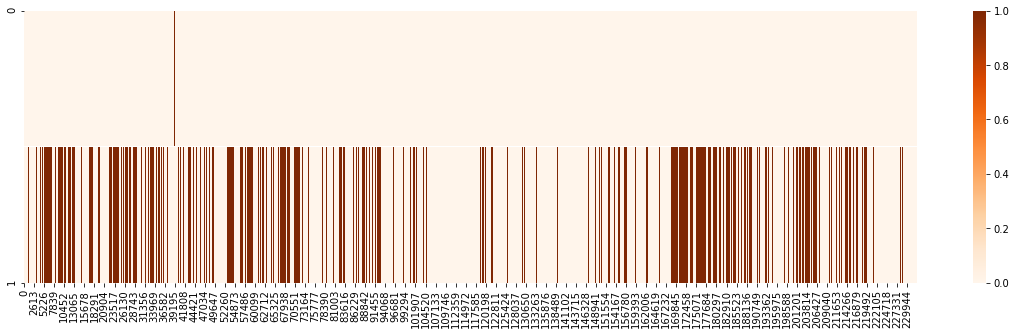

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(test_set[['Ballast_work', 'ballast_prediction_adj']].as_matrix().T, cmap = 'Oranges')
plt.show()

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


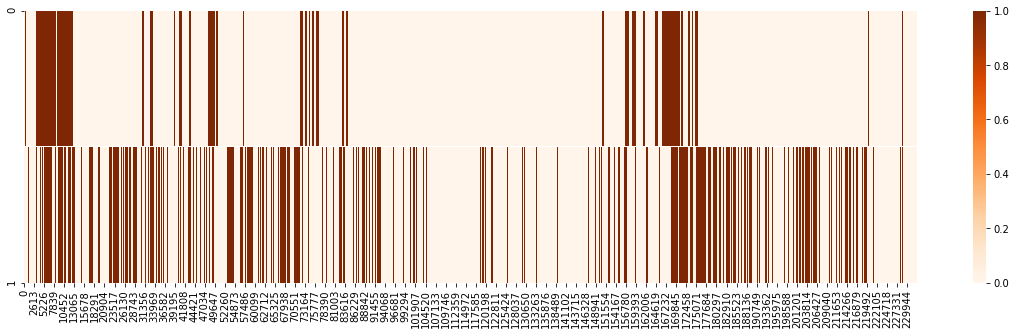

In [321]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(test_set[['has_wo', 'ballast_prediction_adj']].as_matrix().T, cmap = 'Oranges')
plt.show()

## train instead on presence of work


In [338]:
# downsample negative

df_none = train_set[train_set['has_wo']==0]
df_one = train_set[train_set['has_wo']==1]


downsampled_none = resample(df_none, replace = True, n_samples = len(df_one))
downsampled_one = resample(df_one, replace = True, n_samples = len(df_one))

downsampled_df = pd.concat([downsampled_none,downsampled_one])

In [339]:
X_train, X_test, y_train, y_test = train_test_split(downsampled_df[measures], downsampled_df['has_wo'], test_size=0.4, random_state=0)

In [216]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf.predict(X_train)
rf_acc = metrics.accuracy_score(rf_pred, y_train)
print(rf_acc)

j:\shared\omsa\sem3\dva\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.99456925189763


In [340]:
rf_test_pred = rf.predict(X_test)
rf_test_acc = metrics.accuracy_score(rf_test_pred, y_test)
rf_test_pres = metrics.precision_score(rf_test_pred, y_test)
rf_test_recall= metrics.precision_score(rf_test_pred, y_test)
print(rf_test_acc, rf_test_pres, rf_test_recall)

0.8242476755191804 0.8020464548016716 0.8020464548016716


In [5]:
0.8020464548016716*0.8020464548016716/ (0.8020464548016716+0.8020464548016716)

0.4010232274008358

In [341]:
feat_importance = rf.feature_importances_
indices = np.argsort(feat_importance)[::-1]
print('Sorted feature importance:')
print(sorted(feat_importance, reverse = True))

print('Fetaures from most to least important')
print([ measures[i] for i in indices.tolist()])

Sorted feature importance:
[0.10455416988454644, 0.09132510179775492, 0.08603004773439228, 0.07829631519970967, 0.07493512246493825, 0.07295164464042211, 0.07192459750200844, 0.07102622465246364, 0.06456138407188611, 0.062428592774447, 0.05630769849537885, 0.05596639557448185, 0.055270023441697305, 0.05442268176587315]
Fetaures from most to least important
['OV HT', 'SUPER', 'VOLT', 'CON F', 'GAUGE', 'GR HT', 'TR ST', 'VER L', 'TW 10', 'AC LN', 'TOP L', 'TOP R', 'TW 3', 'AC VT']


In [342]:
rf_cv = confusion_matrix(rf_test_pred, y_test)
rf_cv

array([[121331,  28516],
       [ 21991, 115538]], dtype=int64)

In [343]:
y_test_set  =test_set['has_wo']
x_test_set = test_set[measures]


In [344]:
## test on hold out

rfcv_pred = rf.predict(x_test_set)
rf_acc = metrics.accuracy_score(rfcv_pred, y_test_set)
rf_pres = metrics.precision_score(rfcv_pred, y_test_set)
rf_recall = metrics.recall_score(rfcv_pred, y_test_set)
print(rf_acc, rf_pres, rf_recall)

0.7235169901555585 0.2679663357222697 0.1624643718482789


In [345]:
rf_cv = confusion_matrix(rfcv_pred, y_test_set)
rf_cv

array([[160079,  22267],
       [ 42020,   8151]], dtype=int64)

In [347]:
parameters = {'n_estimators': range(5, 20,3), 'max_depth': range(20, 100,10)}
rf_hpt = GridSearchCV(rf, parameters, cv = 5)
rf_hpt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [351]:
print(rf_hpt.best_params_ )

{'max_depth': 90, 'n_estimators': 17}


In [349]:
rfcv_pred_test = rf_hpt.predict(X_test)
rf_acc = metrics.accuracy_score(rfcv_pred_test, y_test)
print(rf_acc)

0.8301597906575358


In [381]:
import pickle
# first pickle model
outfile = open('rf_cv_wo.pickle', 'wb')
pickle.dump(rf_hpt, outfile)
outfile.close()

In [352]:
rfcv_pred = rf_hpt.predict(x_test_set)
rf_acc = metrics.accuracy_score(rfcv_pred, test_set['has_wo'])
rf_pres = metrics.precision_score(rfcv_pred, test_set['has_wo'])
rf_rec = metrics.recall_score(rfcv_pred, test_set['has_wo'])
print(rf_acc ,rf_pres, rf_rec)

0.6902334022888649 0.3445328423959498 0.1674977624344713


In [353]:
test_set['wo_prediction'] = rfcv_pred

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


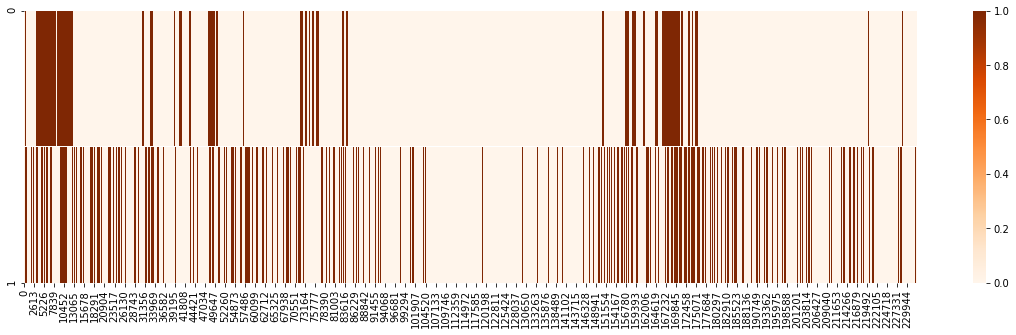

In [354]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(test_set[['has_wo', 'wo_prediction']].as_matrix().T, cmap = 'Oranges')
plt.show()

In [356]:
r = [5,7,10,15,20,50]
t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.1]

for rolls in r:
    for thresh in t:
        rfcv_pred_adj = test_set['wo_prediction'].rolling(rolls).mean().apply(lambda x: smooth_preds(x, thresh))
        acc = metrics.accuracy_score(rfcv_pred_adj, test_set['has_wo'])
        pres = metrics.precision_score(rfcv_pred_adj, test_set['has_wo'])
        recall = metrics.recall_score(rfcv_pred_adj, test_set['has_wo'])
        f1 = metrics.f1_score(rfcv_pred_adj, test_set['has_wo'])
        print('Rolling Mean of {}, threshold of {}'.format(rolls, thresh))
        print('accuracy of {}, precision of {}, recall of {}'.format(acc,pres,recall))
        print('f1 score {}'.format(f1))
        print('*'*50)

Rolling Mean of 5, threshold of 0.1
accuracy of 0.4747996920655264, precision of 0.7099743572884476, recall of 0.1600984491296741
f1 score 0.2612788095094066
**************************************************
Rolling Mean of 5, threshold of 0.2
accuracy of 0.618058034466297, precision of 0.49125517785521733, recall of 0.16927590738139472
f1 score 0.25179031796046975
**************************************************
Rolling Mean of 5, threshold of 0.3
accuracy of 0.618058034466297, precision of 0.49125517785521733, recall of 0.16927590738139472
f1 score 0.25179031796046975
**************************************************
Rolling Mean of 5, threshold of 0.4
accuracy of 0.7234051703746393, precision of 0.30649615359326715, recall of 0.17744237833311127
f1 score 0.2247616292385395
**************************************************
Rolling Mean of 5, threshold of 0.5
accuracy of 0.7234051703746393, precision of 0.30649615359326715, recall of 0.17744237833311127
f1 score 0.224761629238539

Rolling Mean of 20, threshold of 0.4
accuracy of 0.7099523905778933, precision of 0.3521270300479979, recall of 0.1832663187612285
f1 score 0.24106771097082025
**************************************************
Rolling Mean of 20, threshold of 0.5
accuracy of 0.7704038844471587, precision of 0.24248800052600433, recall of 0.19555131366154987
f1 score 0.21650498260856801
**************************************************
Rolling Mean of 20, threshold of 0.6
accuracy of 0.811570766868659, precision of 0.14849760010520086, recall of 0.20139105622185563
f1 score 0.17094631672564195
**************************************************
Rolling Mean of 20, threshold of 0.7
accuracy of 0.8408288426222599, precision of 0.08370044052863436, recall of 0.21790482711400205
f1 score 0.12094437318892215
**************************************************
Rolling Mean of 20, threshold of 0.8
accuracy of 0.8575932082385374, precision of 0.03875994476954435, recall of 0.2333729216152019
f1 score 0.06647871

In [377]:
def smooth_preds(x,thresh):
    if x > thresh:
        ans = 1
    else:
        ans =0
    return ans

test_set['wo_prediction_0.7'] = test_set['wo_prediction'].rolling(10).mean().apply(lambda x: smooth_preds(x, 0.5))

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


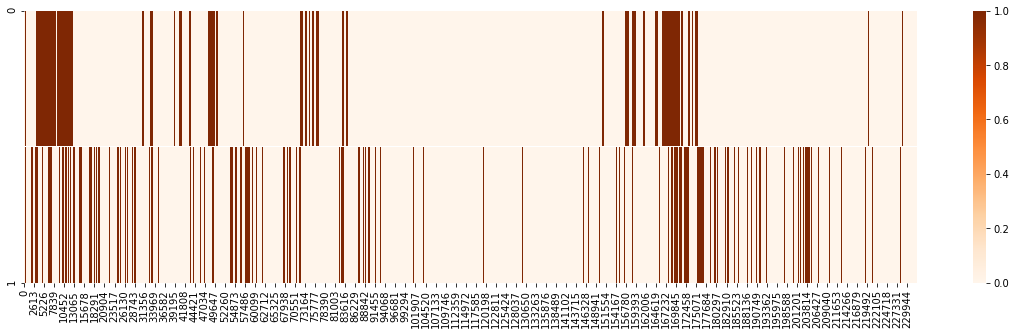

In [378]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(test_set[['has_wo', 'wo_prediction_0.7']].as_matrix().T, cmap = 'Oranges')
plt.show()

In [262]:
rf_acc = metrics.accuracy_score(test_set['wo_prediction_0.7'], y_test_set)
rf_pres = metrics.precision_score(test_set['wo_prediction_0.7'], y_test_set)
rf_recall = metrics.recall_score(test_set['wo_prediction_0.7'], y_test_set)
print(rf_acc, rf_pres, rf_recall)

0.8028531247177626 0.13801038858570583 0.17625325384163237


In [263]:
rf_cv = confusion_matrix(test_set['wo_prediction_0.7'], y_test_set)
rf_cv

array([[182479,  26220],
       [ 19620,   4198]], dtype=int64)

In [10]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(downsampled_df[measures], downsampled_df['num_wo'], test_size =0.33, random_state = 10 )

In [11]:
len(X_train)

87396

In [13]:
y_test.value_counts()

1    14408
2    14328
0    14311
Name: num_wo, dtype: int64

In [14]:
## SVR
from sklearn.svm import SVC

clr = SVC(gamma = 'auto')
clr.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
clr.score(X_train, y_train)

0.9999176925699907

In [16]:
predicted = clr.predict(X_test)


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_test, predicted)

In [19]:
unique_labels(y_test, predicted)

array([0, 1, 2], dtype=int64)

In [20]:
cm

array([[ 2771,  1102, 10438],
       [ 1405,  2854, 10149],
       [  669,   609, 13050]], dtype=int64)

In [21]:
y_test.value_counts()

1    14408
2    14328
0    14311
Name: num_wo, dtype: int64

In [24]:
from sklearn.metrics import f1_score

f1_score(y_test, predicted, average='weighted')

0.37799289003070446

In [30]:
def first_item(x):
    try:
        ans = x[0]
    except:
        ans = 'No work'
    return ans

In [31]:
wo_type = df['Work_order_type'].apply(lambda x: first_item(literal_eval(x)))

In [25]:
measures = ['AC LN', 'AC VT', 'CON F', 'GAUGE', 'GR HT', 'OV HT', 'SUPER', 'TOP L', 'TOP R', 'TR ST',
       'TW 10', 'TW 3', 'Track_code', 'VER L', 'VOLT']

In [28]:
df['wo_type'] = wo_type

In [35]:
var = wo_type.value_counts().to_dict()

In [38]:
var

{'No work': 2610587,
 'Mechanised Resurfacing': 281188,
 'Maintenance Ballasting': 43099,
 'Formation repairs': 20171,
 'Ballast Undercutting': 14405,
 'Top & Line Spot Resurfacing': 12429,
 'Mechanised Resleepering': 6031}

In [45]:
downsampled_wo.head()

,METRAGE,Date,AC LN,AC VT,CON F,GAUGE,GR HT,OV HT,SUPER,TOP L,...,VER L,VER R,VOLT,Track_code,Work_orders,Work_order_type,Latitude,Longitude,num_wo,wo_type


In [36]:
import pickle

In [37]:
filename = 'SVM_all.sav'
pickle.dump(clr, open(filename, 'wb'))